# Wine quality dataset

This is quite a standard ML dataset. 

This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

The dataset contains information related to red wine variants of the Portugese "Vinho Verde". The dataset describes the amount of various chemicals present in the wine and the effect on its quality. 

The dataset allows for classification or regression tasks. The ultimate task is to predict the quality of the wine using the given data

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol

Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

## EDA

In [7]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Read in the data
df = pd.read_csv('wineQT.csv')

In [12]:
# Head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [16]:
# Take a look at the data we have
df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


In [11]:
# Are there any missing values?
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [14]:
# Data shape
print("The shape of the data is:", df.shape)

The shape of the data is: (1143, 13)


In [15]:
# Looking at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [21]:
# We won't need the ID column, so this can be dropped
df.drop("Id", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


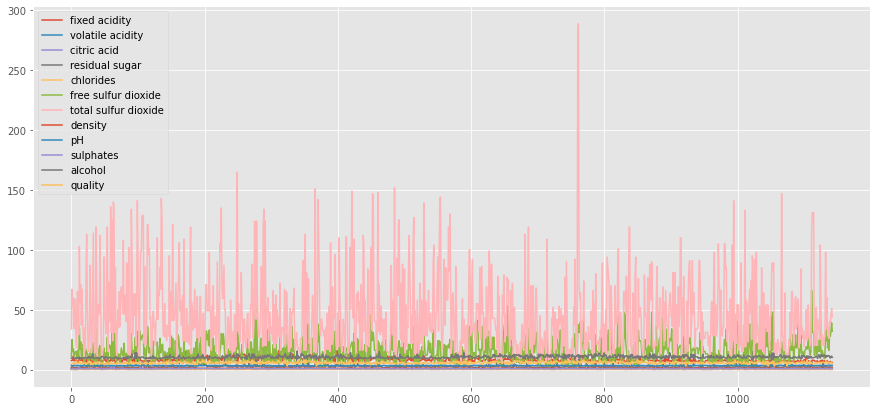

In [23]:
# Graphing the data, just for a look
df.plot(figsize=(15,7))

In [24]:
# Since we are interested in the quality, we should look at the unique quality figures
print("The quality values are:", df["quality"].unique())

The quality values are: [5 6 7 4 8 3]


In [39]:
def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    plt.title(f'{feature} hist plot')
    df[feature].plot(kind='hist')

    plt.subplot(1,3,2)
    plt.title(f'{feature} box plot')
    sns.boxplot(df[feature])
    
    plt.subplot(1, 3, 3)
    plt.title(f'{feature} density plot')
    sns.kdeplot(df[feature])
    plt.tight_layout()

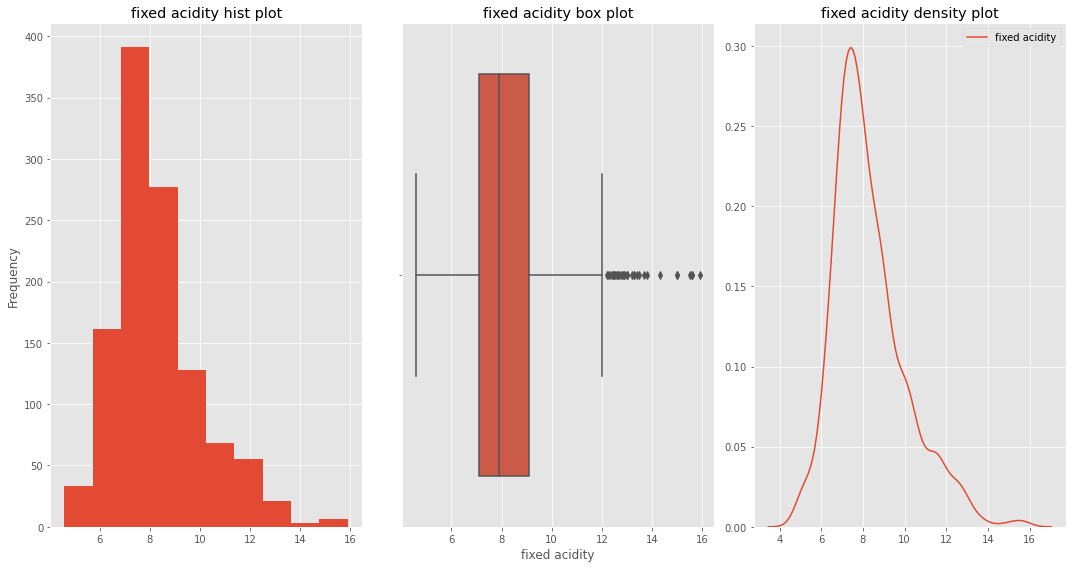

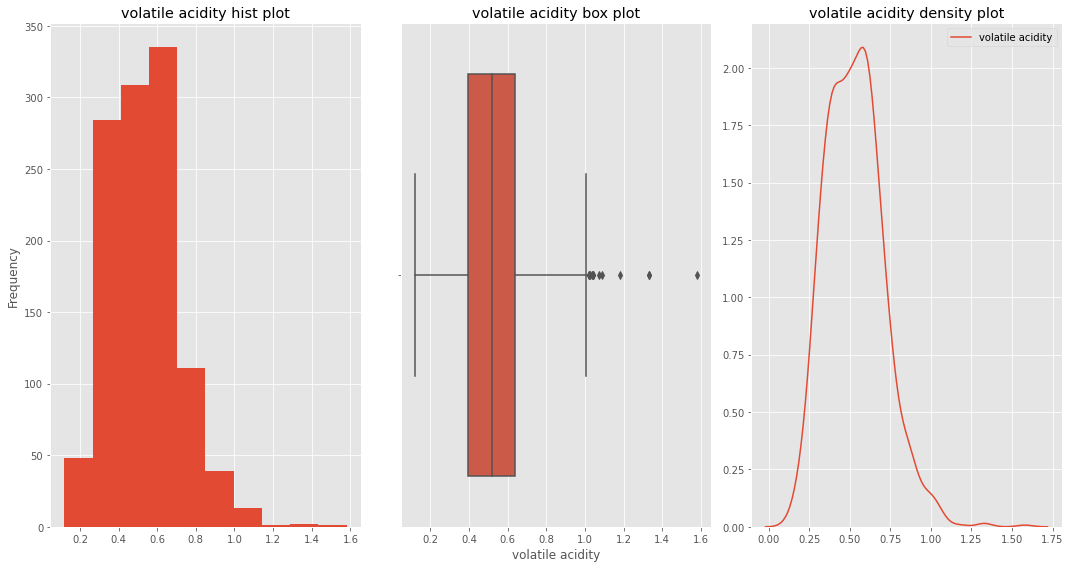

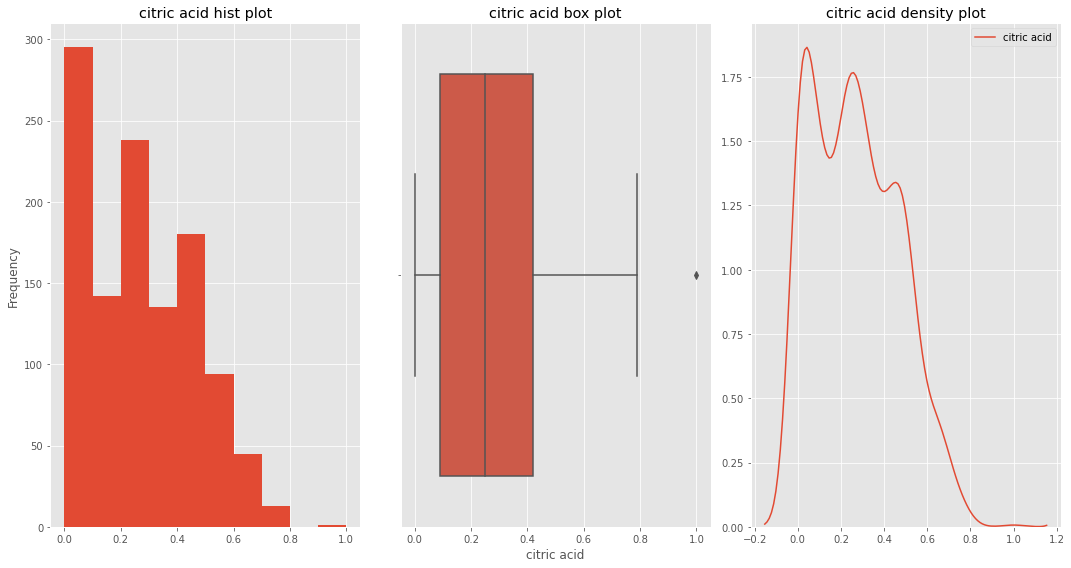

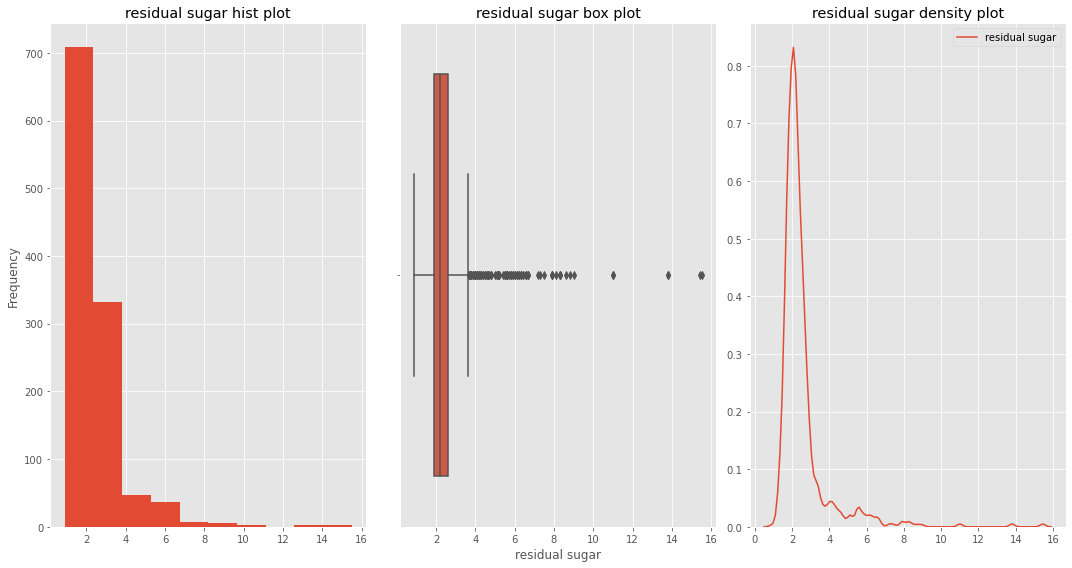

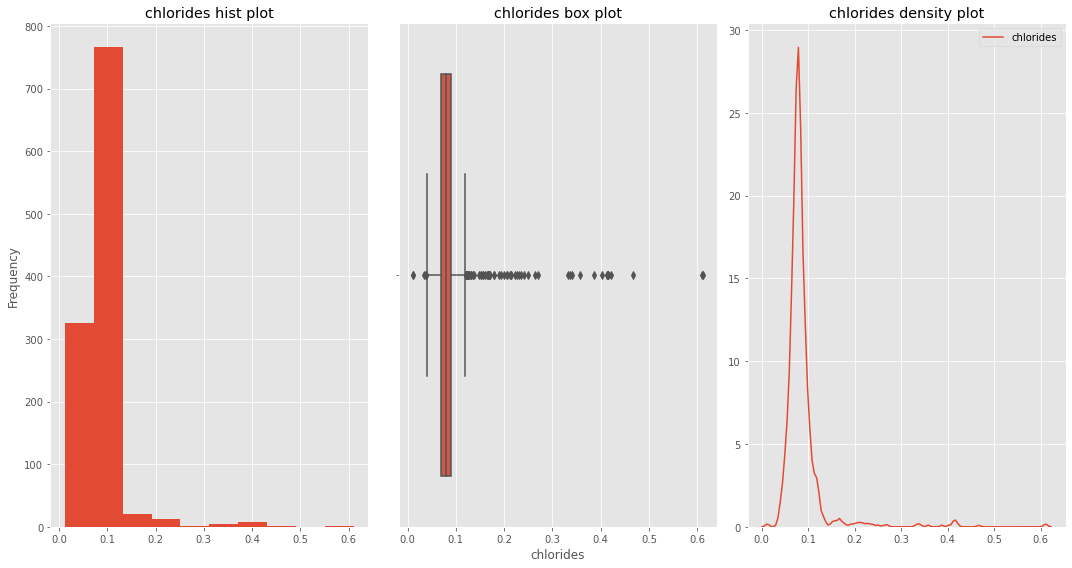

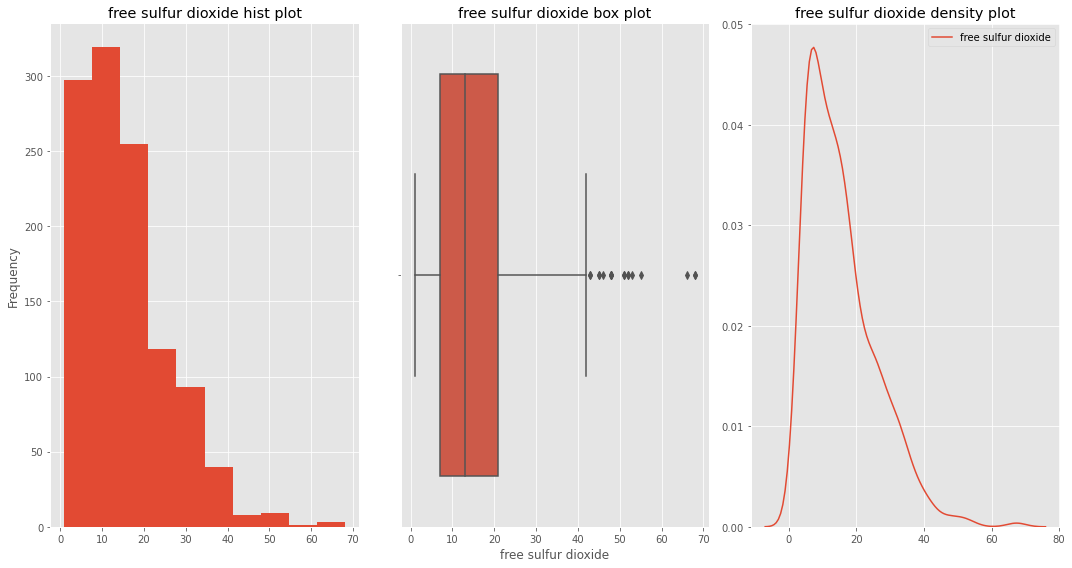

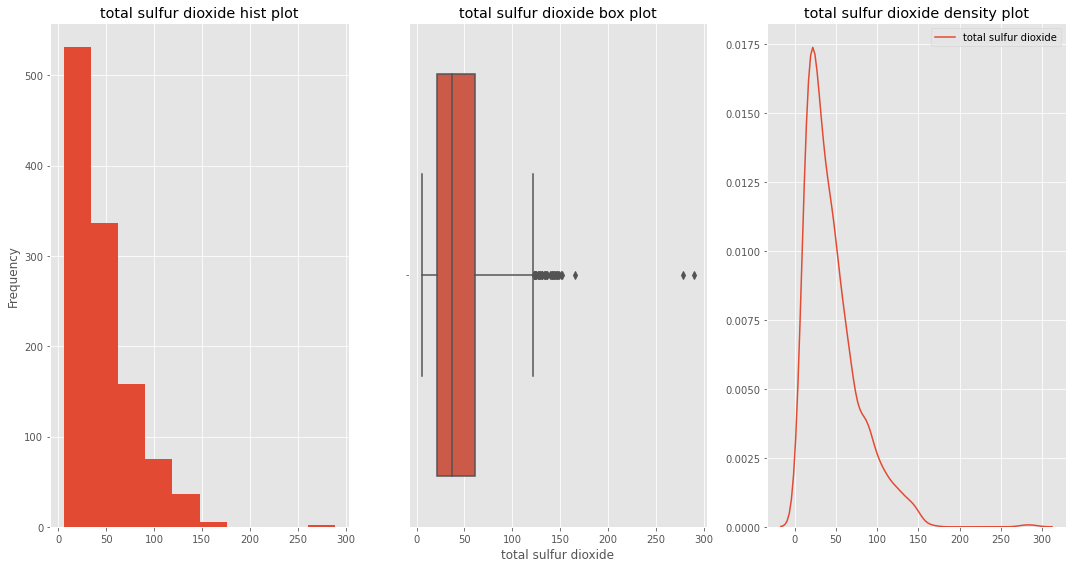

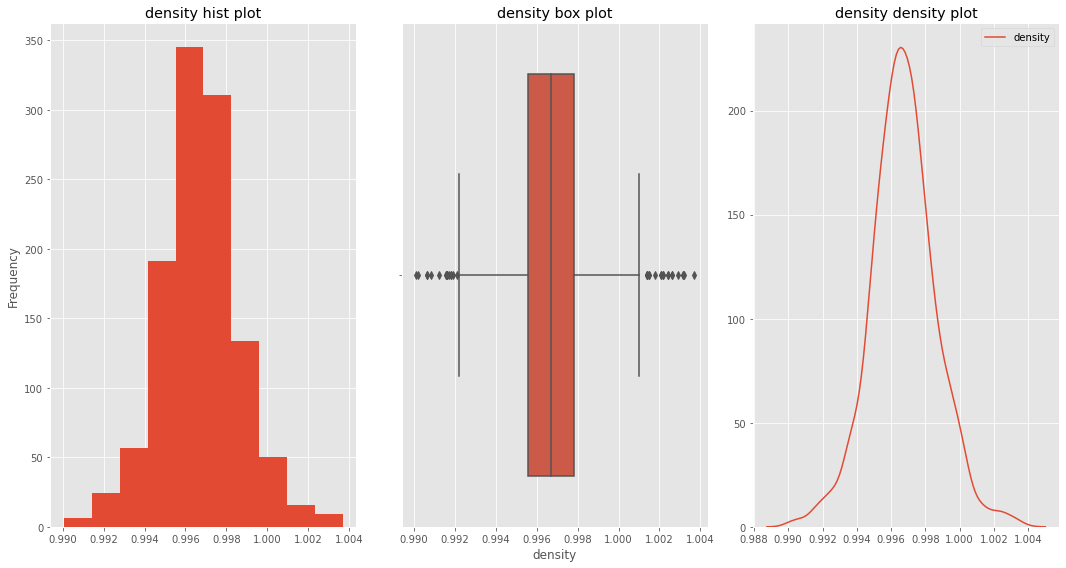

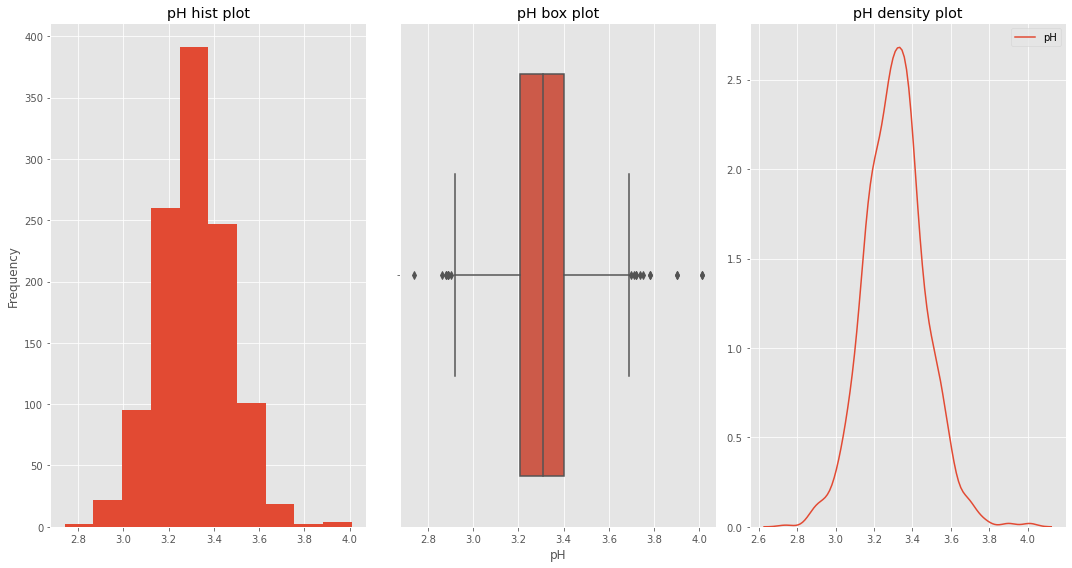

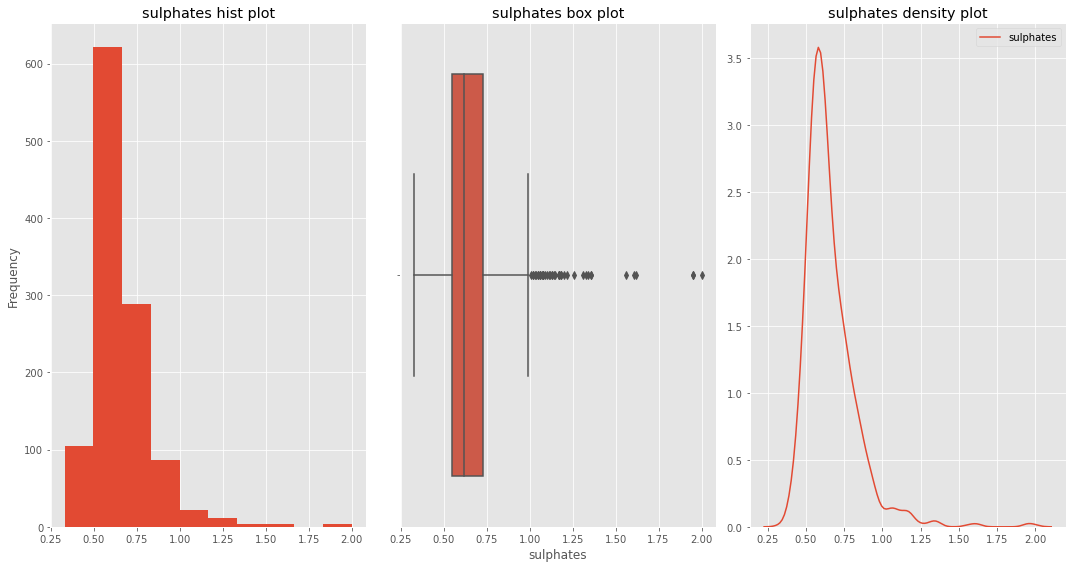

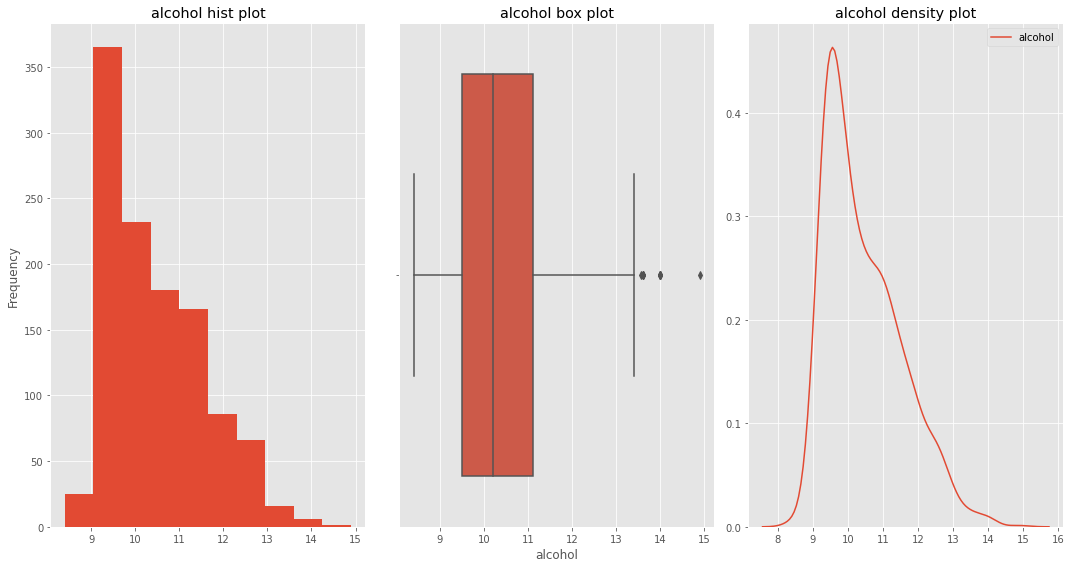

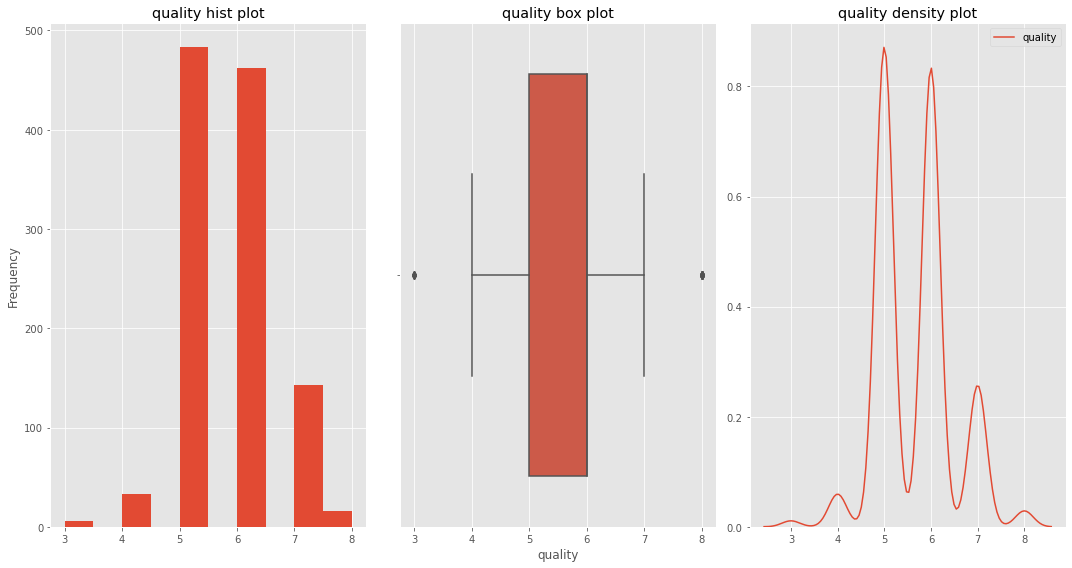

In [40]:
# Checking for distribution and outliers
for i in df.columns:
    feature_viz(i)

We can see that typically the distribiution is *not* normal, and there are outliers in a number of features. 